<a href="https://colab.research.google.com/github/ssupessu/TMSds/blob/develop/hw15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


## Функции определения ошибок

# Для регресии

# Формула MSE
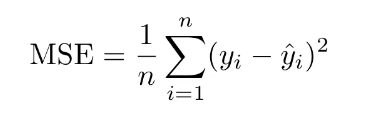

# Формула MAE
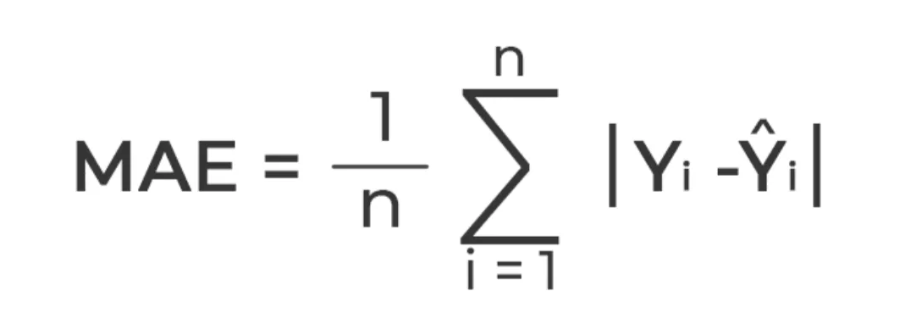

# Формула Log-Cosh Loss
эта формула без усреднения потерь по всем пример(просто еще поделим на N)
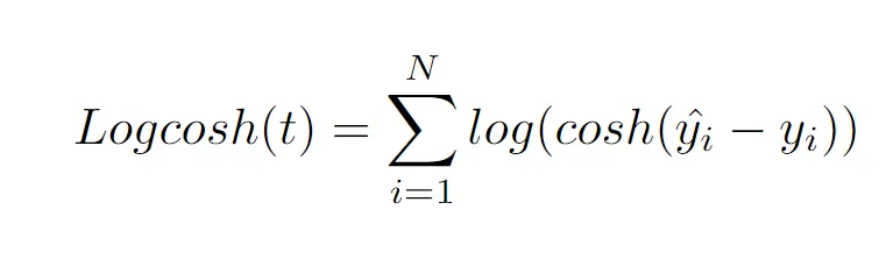

In [ ]:
#Mse
def mean_squared_error(y_target, y_predict):
  n = len(y_target)
  mse = sum((y_target[i] - y_predict[i])**2 for i in range(n))/ n
  return mse

#Mae
def mean_absolute_error(y_target, y_predict):
  mae = sum(abs(y_target[i] - y_predict[i]) for i in range(len(y_target)))/ len(y_target)
  return mae

#Log-Cosh Loss
def log_cosh_loss(y_target, y_predict):
  lcl = sum(np.log(np.cosh(y_predict[i] - y_target[i])) for i in range(len(y_target)))/ len(y_target)
  return lcl

In [ ]:
y_target = np.array([2, 4 , 3, 5, 3 , 4, 5, 2, 3, 4])
y_predict = np.array([2.2, 3.9, 2.1, 5, 3, 3.7, 4.8, 1.75, 2.54, 4])

mse_result = mean_squared_error(y_target, y_predict)
mae_result = mean_absolute_error(y_target, y_predict)
lcl_result = log_cosh_loss(y_target, y_predict)

print(f'mse: {mse_result}\nmae: {mae_result}\nlog cosh loss: {lcl_result} ')


mse: 0.12640999999999997
mae: 0.24100000000000002
log cosh loss: 0.05820955043836769 


# Для классификации

# Формула для Binary Cross-Entropy Loss
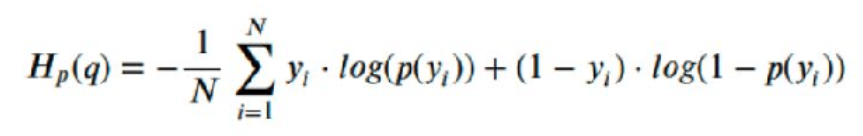

# Формула для F1-score
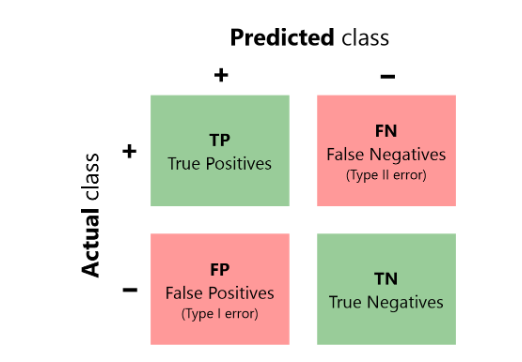
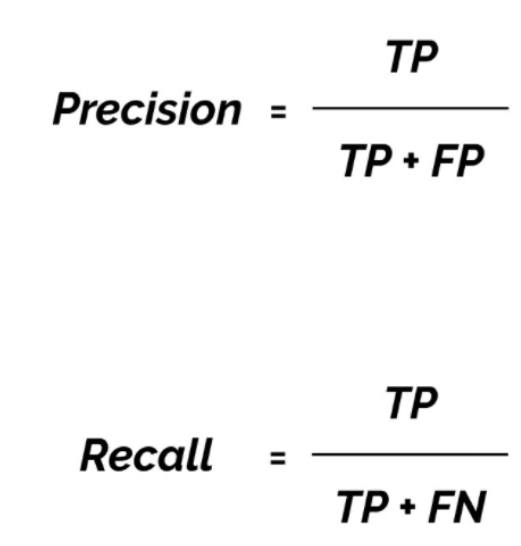
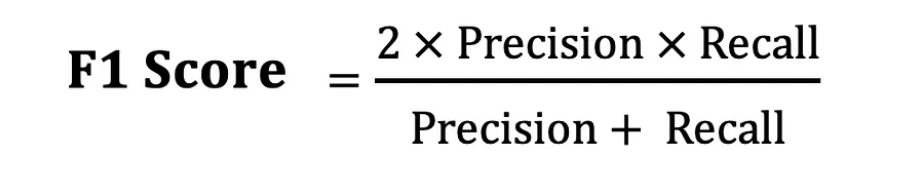

In [ ]:
#Binary Cross-Entropy Loss
def binary_cross_entropy(y_target, y_predict):
  bce = -sum(y_target[i]*np.log(y_predict[i]) - (1 - y_target[i])*np.log(1 - y_predict[i]) for i in range(len(y_target))) / len(y_target)
  return bce

#Accuracy
def accurancy(y_target, y_predict):
  cnt_correct = 0
  for i in range(len(y_target)):
    if y_target[i] == y_predict[i]:
      cnt_correct+=1
  acc = cnt_correct/len(y_target)
  return acc

#F1-score
def f1_score(y_target, y_predict):
  tp = 0
  fp = 0
  fn = 0
  for i in range(len(y_target)):
    if y_target[i] == y_predict[i] and y_target[i] == 1:
      tp+=1
    elif y_target[i] != y_predict[i] and y_target[i] == 0:
      fp+=1
    elif y_target[i] != y_predict[i] and y_target[i] == 1:
      fn+=1
  precision = tp/(tp + fp)
  recall = tp/(tp + fn)
  f1 = 2*precision*recall/(precision + recall)
  return f1


In [ ]:
y_target = np.array([1, 0 , 0, 1, 0 , 1, 1, 0, 1, 1])
y_predict_probability = np.array([0.1, 0.5, 0.9, 0.85, 0.47, 0.9, 0.25, 0.33, 0.75, 0.1])
y_predict = np.array([1, 0, 1, 1, 1 , 0 , 0 , 1 , 1, 0])

bse_result = binary_cross_entropy(y_target, y_predict_probability)
acc_result = accurancy(y_target, y_predict)
f1_result = f1_score(y_target, y_predict)

print(f'Binary Cross-Entropy Loss: {bse_result}\nAccuracy: {acc_result}\nF1-score: {f1_result}')

Binary Cross-Entropy Loss: 0.2515937952128277
Accuracy: 0.4
F1-score: 0.5


# Линейная регрессия

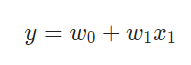

In [ ]:
def linear_regression(X, y, learning_rate = 0.01, epochs = 1000):
  n = len(X)
  w0 = 0
  w1 = 0

  for _ in range(epochs):
    y_predict = w0 + w1*X
    dw0 = -2/n*sum(y - y_predict)
    dw1 = -2/n*sum(X*(y - y_predict))

    w0 -=learning_rate*dw0
    w1 -=learning_rate*dw1

  return w0, w1

In [ ]:
X = np.array([1,2,3,4])
y = np.array([2,4,6,8])


w0, w1 = linear_regression(X, y)

print("w0 =", w0)
print("w1 =", w1)

w0 = 0.030404521305361965
w1 = 1.9896587550255742


In [ ]:
print(w0 + w1*2)#ожидаем близкое к 4

4.00972203135651
